# Setup

## Import modules

In [1]:
import numpy as np
import pandas as pd

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import sklearn.datasets as datasets

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

## Load and prepare data

In [2]:
dataS = datasets.load_wine()
# dataS = datasets.load_breast_cancer()
# dataS = datasets.load_iris()

X, y = dataS.data, dataS.target

print(f'Number of input features (d): {X.shape[1]}')
print(f'Unique target classes: {np.unique(y)}')

classes = np.unique(y)

Number of input features (d): 13
Unique target classes: [0 1 2]


In [11]:
# Print the different input features
print(dataS.feature_names)
# Print the different target names
print(dataS.target_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3,
    stratify=y, random_state=43)


# LDA and LR

In [4]:
#==============================================================================
# Scale features using StandardScaler class in scikit-learn 
#==============================================================================
# Initialise standard scaler and compute mean and standard deviation from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and standard deviation from training data
X_train_std = sc.transform(X_train)
X_test_std  = sc.transform(X_test)

## Apply LDA to data

In [12]:
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda  = lda.transform(X_test_std)

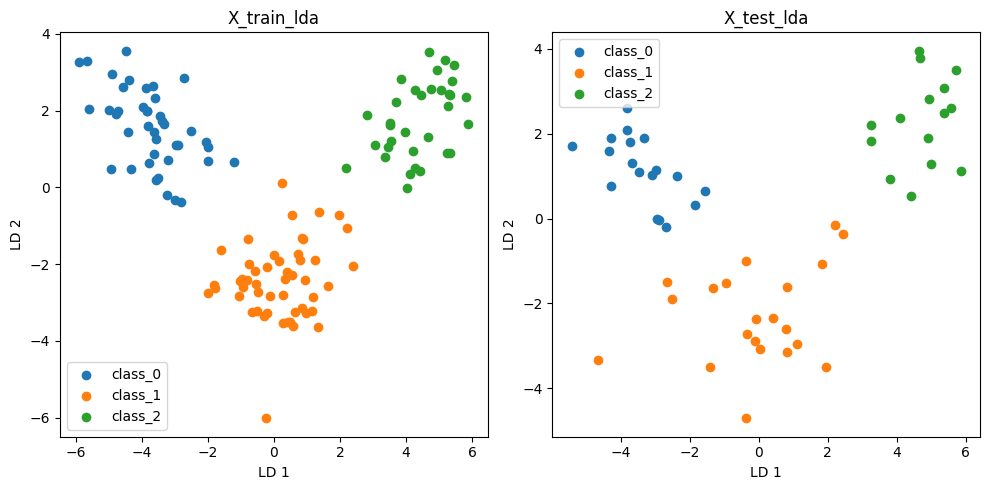

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Scatter plot for X_train_lda and X_test_lda
for class_idx in classes:
    axs[0].scatter(X_train_lda[y_train == class_idx, 0], X_train_lda[y_train == class_idx, 1], label=dataS.target_names[class_idx])
    axs[1].scatter(X_test_lda[y_test == class_idx, 0],   X_test_lda[y_test == class_idx, 1],   label=dataS.target_names[class_idx])

axs[0].set_xlabel('LD 1')
axs[0].set_ylabel('LD 2')
axs[0].set_title('X_train_lda')
axs[0].legend()

axs[1].set_xlabel('LD 1')
axs[1].set_ylabel('LD 2')
axs[1].set_title('X_test_lda')
axs[1].legend()

plt.tight_layout()
plt.show()

## Train logistic regression classifier with LDA features

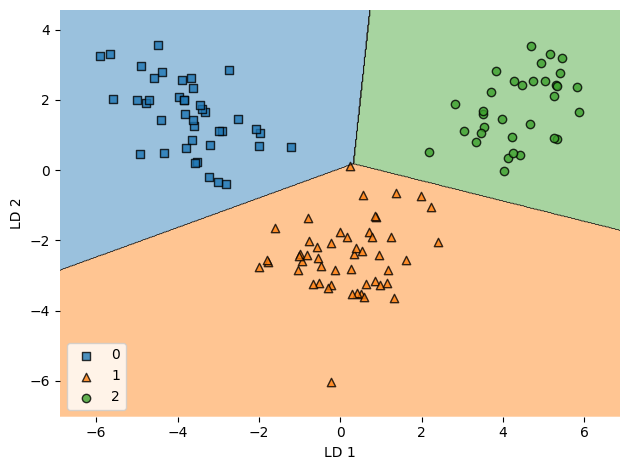

In [7]:
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr = lr.fit(X_train_lda, y_train)

# =============================================================================
# Plot decision regions with training samples
# =============================================================================
plot_decision_regions(X_train_lda, y_train, clf=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Plot decision regions with test samples

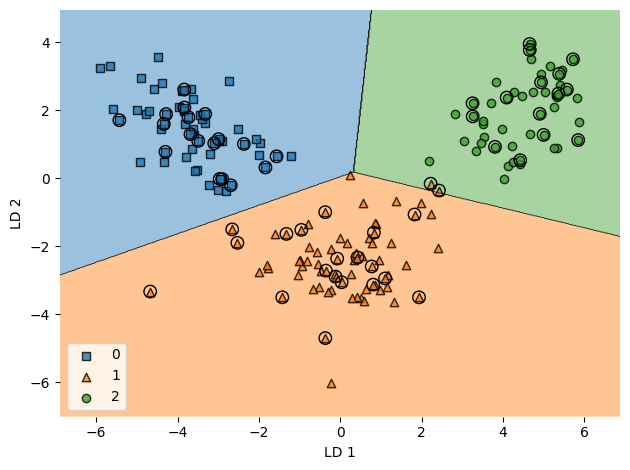

In [8]:
plot_decision_regions(np.vstack([X_train_lda,X_test_lda]), np.hstack([y_train,y_test]), clf=lr, X_highlight=X_test_lda)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## Print out training and test accuracy

In [9]:
print(f'LDA - logReg - TRAIN accuracy = {lr.score(X_train_lda, y_train):.3f}')
print(f'LDA - logReg - Test accuracy  = {lr.score(X_test_lda, y_test):.3f}')

LDA - logReg - TRAIN accuracy = 1.000
LDA - logReg - Test accuracy  = 0.963


## Predict directly using LDA

In [10]:
y_pred_dir = lda.predict(X_test_std)
print(f'LDA - Test accuracy  = {lda.score(X_test_std, y_test):.3f}')

LDA - Test accuracy  = 0.963
